**¿Cómo incorporar los parches de hábitat en las medidas de biodiversidad?**

In [1]:
import numpy as np
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

In [2]:
%run ../modelo.py
%run ../medidas_biodiversidad.py

In [3]:
np.set_printoptions(precision=4, suppress=True)

In [4]:
plt.style.use('seaborn-whitegrid')

## Leer datos

In [28]:
datos_iteraciones = []
with open('../iteraciones.txt', 'r') as file:
    rows = file.readlines()
    for row in rows:
        datos_iteraciones.append([row[:20], int(row[-2])])

In [29]:
all_condiciones_iniciales = [np.loadtxt("../comunidades/" + file[0][:20] + "-c.txt") for file in datos_iteraciones]
all_tasas_reproduccion = [np.loadtxt("../comunidades/" + file[0][:20] + "-v.txt") for file in datos_iteraciones]
all_matriz_interacciones = [np.loadtxt("../comunidades/" + file[0][:20] + '-m.txt') for file in datos_iteraciones]
all_iteraciones = [file[1] for file in datos_iteraciones]

In [130]:
def modificar_matriz(m):
    for i in range(10):
        m[i][i] *= 15
    return m

def modificar_tasas(tasa):
    tasa[tasa > 0] = tasa[tasa > 0] * 20
    return tasa

def modificar_condiciones0(c0):
    c0 = c0 * 10
    return c0

def modificar_matriz2(m):
    for i in range(10):
        m[i][i] *= 5
    return m

In [31]:
# Escoger 40 comunidades de cada tipo: oscilante y punto fijo
os = []
eq = []
for i, comunidad in enumerate(datos_iteraciones):
    if comunidad[0][-2:] == 'os' and comunidad[1] != 0:
        os.append(i)
    elif comunidad[0][-2:] == 'eq' and comunidad[1] != 0:
        eq.append(i)    

In [32]:
comunidades = os[2:3] + eq[2:3]

In [33]:
comunidades

[64, 2]

## Experimento 1: comunidades originales

Con las comunidades originales, sin modificar parámetros de dispersión o mortalidad.

In [15]:
paisajes = np.load("../paisajes_h2.npy")

Dispersion = {"b": 0.3,
              "m": 1,
              "i": 1}

Mortalidad = {"b": 0,
              "m": 0.3,
              "i": 0.6}
t_total = 40

In [11]:
for c in comunidades:
    res = [None] * len(paisajes)
    for p in range(len(paisajes)):
        res[p] = matriz_agroecologica(paisajes[p].tolist(),
                                      all_matriz_interacciones[c], 
                                      all_tasas_reproduccion[c], 
                                      all_condiciones_iniciales[c],
                                      t_total, 
                                      Dispersion,
                                      Mortalidad,
                                      all_iteraciones[c])
        #res[p] = res[p][-all_iteraciones[c]:] # comentar esta línea para guardar todo
    res = np.array(res)
    np.save("exp1_c{:03d}".format(c), res)

## Experimento 2: comunidades modificadas

Con las comunidades modificadas, pero sin modificar parámetros de dispersión o mortalidad. Estas son las comunidades que se usaron para la versión actual.

In [14]:
paisajes = np.load("../paisajes_h2.npy")

Dispersion = {"b": 0.3,
              "m": 1,
              "i": 1}

Mortalidad = {"b": 0,
              "m": 0.3,
              "i": 0.6}
t_total = 40

matriz_interacciones2 = deepcopy(all_matriz_interacciones)
matriz_interacciones2 = [modificar_matriz(m) for m in matriz_interacciones2]

condiciones_iniciales2 = deepcopy(all_condiciones_iniciales)
condiciones_iniciales2 = [modificar_condiciones0(m) for m in condiciones_iniciales2]

tasas_reproduccion2 = deepcopy(all_tasas_reproduccion)
tasas_reproduccion2 = [modificar_tasas(t) for t in tasas_reproduccion2]

pasos_mm = 2

NameError: name 'all_matriz_interacciones' is not defined

In [13]:
for c in comunidades:
    res = [None] * len(paisajes)
    for p in range(len(paisajes)):
        res[p] = matriz_agroecologica(paisajes[p].tolist(),
                                      matriz_interacciones2[c], 
                                      tasas_reproduccion2[c], 
                                      condiciones_iniciales2[c],
                                      t_total, 
                                      Dispersion,
                                      Mortalidad,
                                      pasos_mm)
        #res[p] = res[p][-all_iteraciones[c]:] guardar todo
    res = np.array(res)
    np.save("exp2_c{:03d}".format(c), res)

## Experimento 3: 

Aumentando pasos de migración a 5, comunidades modificadas y mismos parámetros de dispersión y mortalidad que Exp2.

In [6]:
paisajes = np.load("../paisajes_h2.npy")

Dispersion = {"b": 0.3,
              "m": 1,
              "i": 1}

Mortalidad = {"b": 0,
              "m": 0.3,
              "i": 0.6}
t_total = 40

matriz_interacciones2 = deepcopy(all_matriz_interacciones)
matriz_interacciones2 = [modificar_matriz(m) for m in matriz_interacciones2]

condiciones_iniciales2 = deepcopy(all_condiciones_iniciales)
condiciones_iniciales2 = [modificar_condiciones0(m) for m in condiciones_iniciales2]

tasas_reproduccion2 = deepcopy(all_tasas_reproduccion)
tasas_reproduccion2 = [modificar_tasas(t) for t in tasas_reproduccion2]

pasos_mm = 5

NameError: name 'all_matriz_interacciones' is not defined

In [15]:
for c in comunidades:
    res = [None] * len(paisajes)
    for p in range(len(paisajes)):
        res[p] = matriz_agroecologica(paisajes[p].tolist(),
                                      matriz_interacciones2[c], 
                                      tasas_reproduccion2[c], 
                                      condiciones_iniciales2[c],
                                      t_total, 
                                      Dispersion,
                                      Mortalidad,
                                      pasos_mm)
        #res[p] = res[p][-all_iteraciones[c]:] guardar todo
    res = np.array(res)
    np.save("exp3_c{:03d}".format(c), res)

## Experimento 4
Aumentando pasos de migración a 5 y mortalidad en celdas intensivas a 0.85; mismos parámetros de dispersión y comunidades modificadas. Aumentando tiempo a 60

In [135]:
paisajes = np.load("../paisajes_h2.npy")

Dispersion = {"b": 0.3,
              "m": 1,
              "i": 1}

Mortalidad = {"b": 0,
              "m": 0.3,
              "i": 0.85}
t_total = 60

matriz_interacciones2 = deepcopy(all_matriz_interacciones)
matriz_interacciones2 = [modificar_matriz(m) for m in matriz_interacciones2]

condiciones_iniciales2 = deepcopy(all_condiciones_iniciales)
condiciones_iniciales2 = [modificar_condiciones0(m) for m in condiciones_iniciales2]

tasas_reproduccion2 = deepcopy(all_tasas_reproduccion)
tasas_reproduccion2 = [modificar_tasas(t) for t in tasas_reproduccion2]

pasos_mm = 5

In [136]:
for c in comunidades:
    res = [None] * len(paisajes)
    for p in range(len(paisajes)):
        res[p] = matriz_agroecologica(paisajes[p].tolist(),
                                      matriz_interacciones2[c], 
                                      tasas_reproduccion2[c], 
                                      condiciones_iniciales2[c],
                                      t_total, 
                                      Dispersion,
                                      Mortalidad,
                                      pasos_mm)
        #res[p] = res[p][-all_iteraciones[c]:] guardar todo
    res = np.array(res)
    np.save("exp4_h2_c{:03d}".format(c), res)

## Experimento 5

Matriz de interacciones modificadas 2.

In [133]:
paisajes = np.load("../paisajes_h2.npy")

Dispersion = {"b": 0.3,
              "m": 1,
              "i": 1}

Mortalidad = {"b": 0,
              "m": 0.3,
              "i": 0.85}
t_total = 60

matriz_interacciones2 = deepcopy(all_matriz_interacciones)
matriz_interacciones2 = [modificar_matriz2(m) for m in matriz_interacciones2]

condiciones_iniciales2 = deepcopy(all_condiciones_iniciales)
condiciones_iniciales2 = [modificar_condiciones0(m) for m in condiciones_iniciales2]

tasas_reproduccion2 = deepcopy(all_tasas_reproduccion)
tasas_reproduccion2 = [modificar_tasas(t) for t in tasas_reproduccion2]

pasos_mm = 5

In [134]:
for c in comunidades:
    res = [None] * len(paisajes)
    for p in range(len(paisajes)):
        res[p] = matriz_agroecologica(paisajes[p].tolist(),
                                      matriz_interacciones2[c], 
                                      tasas_reproduccion2[c], 
                                      condiciones_iniciales2[c],
                                      t_total, 
                                      Dispersion,
                                      Mortalidad,
                                      pasos_mm)
        #res[p] = res[p][-all_iteraciones[c]:] guardar todo
    res = np.array(res)
    np.save("exp5_h2_c{:03d}".format(c), res)

## Análisis de datos

In [37]:
%matplotlib inline

Estructura de poblaciones es `poblaciones[intensificacion, tiempo, x, y, especie]` y de población es [tiempo, x, y, especie]

In [202]:
poblaciones = np.load('./exp4_h4_c064.npy')
poblacion = poblaciones[0, :, :, :, :]
paisaje = paisajes[0].tolist()

biomasa_min = 0.0001

# Biomasa paisaje
biomasa = [None] * len(poblacion)
riqueza = [None] * len(poblacion)

for i in range(len(poblacion)):
    biomasa[i] = riqueza_paisaje(poblacion, i, biomasa_min)[0] 
    riqueza[i] = riqueza_paisaje(poblacion, i, biomasa_min)[1]

riqueza_milpa = [None] * len(poblacion)
biomasa_milpa = [None] * len(poblacion)

for i in range(len(poblacion)):
    riqueza_milpa[i] = riqueza_agricola(poblacion, paisaje, i, biomasa_min)[1]   
    biomasa_milpa[i] = riqueza_agricola(poblacion, paisaje, i, biomasa_min)[0]   

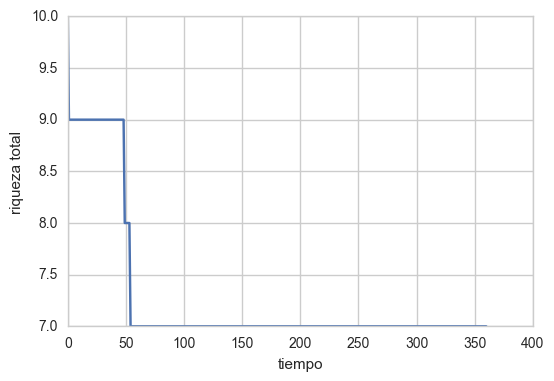

In [195]:
fig = plt.figure()
plt.plot(range(len(riqueza_milpa)), riqueza)
plt.xlabel('tiempo')
plt.ylabel('riqueza total')
#plt.xlim(0, 100)

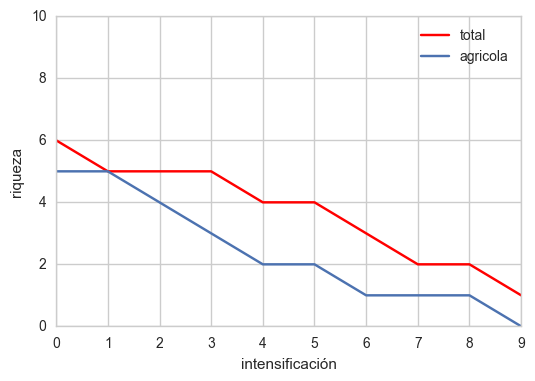

In [203]:
riqueza_vs_intesificacion = np.zeros(10)
for i in range(10):
    riqueza_vs_intesificacion[i] = riqueza_paisaje(poblaciones[i,:,:,:,:], -1, 50)[1]

riquezaagricola_vs_intesificacion = np.zeros(10)
for i in range(10):
    riquezaagricola_vs_intesificacion[i] = riqueza_agricola(poblaciones[i,:,:,:,:], paisaje, -1, 50)[1]

fig = plt.figure()
plt.plot(range(10), riqueza_vs_intesificacion, color = 'r', label='total')
plt.plot(range(10), riquezaagricola_vs_intesificacion, label='agricola')
plt.xlabel('intensificación')
plt.ylabel('riqueza')
plt.ylim(0, 10)
plt.legend()

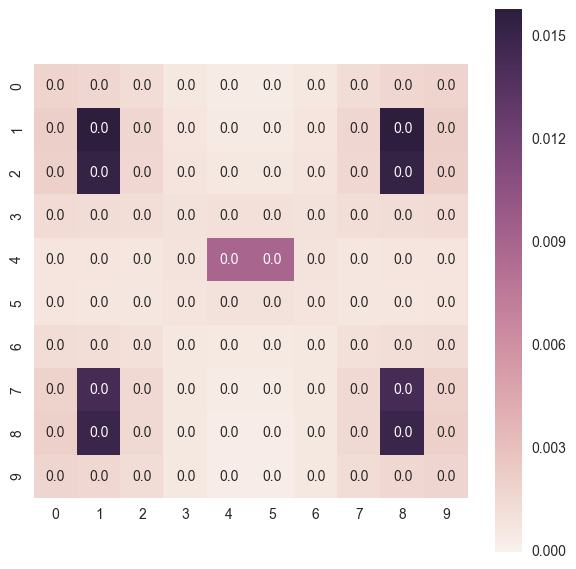

In [80]:
biomasa_celda, riqueza_celda = medidas_por_celda(poblaciones[0], -2, biomasa_min=0.1)

fig = plt.figure(figsize=(7,7))
seaborn.heatmap(biomasa_celda, annot=True, fmt='.1f', square=True, vmin=0) 
#seaborn.heatmap(poblacion[-2, :, :, 1], vmin = 0.0, annot=True, fmt=".1f", square=True) 

## Histograma de especies vivas.

In [81]:
abundancia_especies_agricola = np.zeros((10, 10))
for i in range(10):
    abundancia_especies_agricola[i] = medida_area(poblaciones[i], paisaje, t=-2, biomasa_min=biomasa_min)[1]

In [82]:
abundancia_especies_total = np.zeros((10, 10))
for i in range(10):
    for especie in range(10):
        abundancia_especies_total[i, especie] = np.sum(poblaciones[i,-2,:,:,especie])

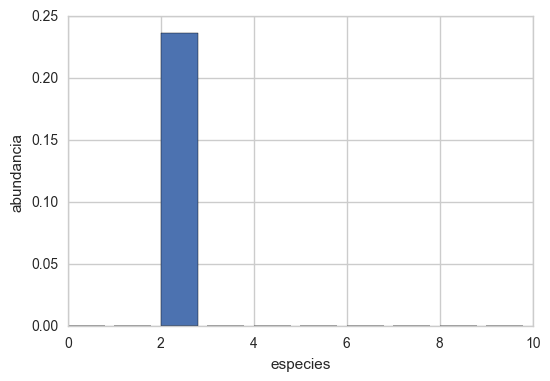

In [83]:
fig = plt.figure()
plt.bar(range(10), abundancia_especies_total[0])
plt.bar(range(10), abundancia_especies_total[9], color='r')
plt.xlabel('especies')
plt.ylabel('abundancia')

In [84]:
(abundancia_especies_total[9] / abundancia_especies_total[0])*100

array([ 0.    ,  0.    ,  0.0004,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ])

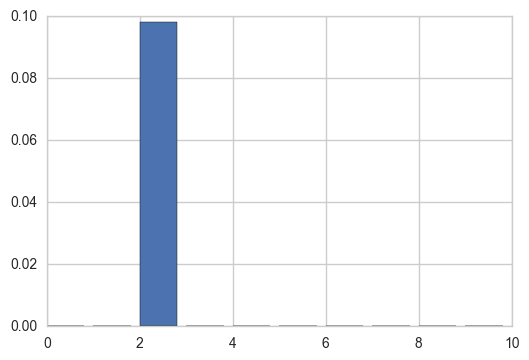

In [85]:
fig = plt.figure()
plt.bar(range(10), abundancia_especies_agricola[0])
plt.bar(range(10), abundancia_especies_agricola[9], color='r')
#plt.plot(range(11), np.ones(11)*15, color = 'r')
plt.show()

In [86]:
(abundancia_especies_agricola[9] / abundancia_especies_agricola[0]) * 100

array([ 0.    ,  0.    ,  0.0002,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ])

In [87]:
abundancia_especies_total[0]

array([ 0.    ,  0.    ,  0.2365,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ])

In [88]:
abundancia_especies_total[9]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [56]:
print(all_matriz_interacciones[2], '\n \n', matriz_interacciones2[2])

[[-0.0245  1.5208  0.      0.      0.      1.7761  1.8356  0.      0.      0.    ]
 [-0.0446 -0.1706  0.      0.      0.7511 -0.1902 -0.0601  0.     -0.0269
   0.    ]
 [ 0.      0.     -0.1742 -0.0298  0.     -0.1001  0.     -0.0083 -0.0771
   0.    ]
 [ 0.      0.      0.4691 -0.1414  0.     -0.1986  0.     -0.0075 -0.06
   0.4984]
 [ 0.     -0.1887  0.      0.     -0.1513 -0.0828  0.     -0.0996 -0.0432
   0.2645]
 [-0.0144  0.6501  0.3387  0.1376  1.8303 -0.0138 -0.1833  0.      0.
   1.2059]
 [-0.1376  0.8773  0.      0.      0.      1.0699 -0.1749  0.      1.9656
   0.    ]
 [ 0.      0.      1.8327  1.3119  0.7513  0.      0.     -0.1671  0.
   0.7834]
 [ 0.      0.1163  1.6442  1.4942  0.7449  0.     -0.0682  0.     -0.1216
   0.4001]
 [ 0.      0.      0.     -0.1125 -0.0887 -0.109   0.     -0.0693 -0.0556
  -0.1776]] 
 
 [[-0.3678  1.5208  0.      0.      0.      1.7761  1.8356  0.      0.      0.    ]
 [-0.0446 -2.5587  0.      0.      0.7511 -0.1902 -0.0601  0.     -0.0269


In [206]:
print(all_tasas_reproduccion[2], '\n \n', tasas_reproduccion2[2])

NameError: name 'tasas_reproduccion2' is not defined

In [207]:
print(all_condiciones_iniciales[2], '\n \n', condiciones_iniciales2[2])

NameError: name 'condiciones_iniciales2' is not defined

## Parche hábitat vs agrícola

**¿Qué pasa dentro de un parche de hábitat?**

Primero, ¿qué pasa con la biomasa dentro de un parche de bosque?

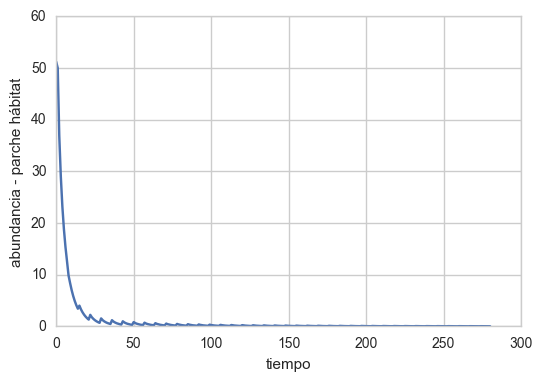

In [93]:
un_bosque = np.zeros(np.shape(poblaciones)[1])
for t in range(np.shape(poblaciones)[1]):
    un_bosque[t] = np.sum(poblaciones[0, t, 4, 4, :])
fig = plt.figure()
plt.plot(un_bosque)
#plt.xlim(110, 130)
#plt.ylim(0, 200)
plt.xlabel('tiempo')
plt.ylabel('abundancia - parche hábitat')

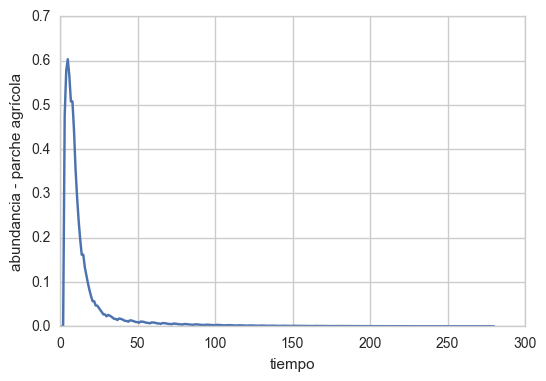

In [95]:
un_bosque = np.zeros(np.shape(poblaciones)[1])
for t in range(np.shape(poblaciones)[1]):
    un_bosque[t] = np.sum(poblaciones[1, t, 6, 4, :])
fig = plt.figure()
plt.plot(un_bosque)
#plt.xlim(110, 130)
plt.xlabel('tiempo')
plt.ylabel('abundancia - parche agrícola')

Luego, ¿qué pasa con la riqueza?

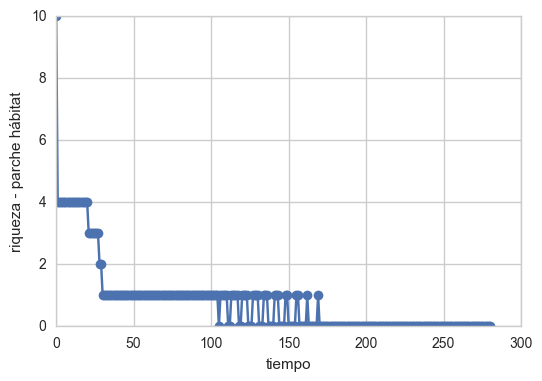

In [104]:
riqueza_un_bosque = np.zeros(np.shape(poblaciones)[1])
for t in range(np.shape(poblaciones)[1]):
    temp = medidas_por_celda(poblaciones[0], t, biomasa_min=.1)[1]
    riqueza_un_bosque[t] = temp[4, 4]

fig = plt.figure()
plt.plot(riqueza_un_bosque, '-o')
#plt.xlim(110, 130)
plt.ylim(0, 10)
plt.xlabel('tiempo')
plt.ylabel('riqueza - parche hábitat')

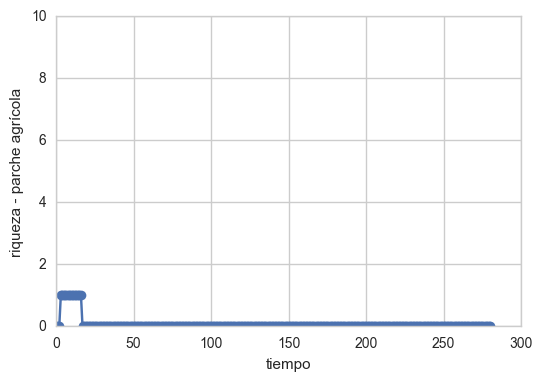

In [105]:
riqueza_un_bosque = np.zeros(np.shape(poblaciones)[1])
for t in range(np.shape(poblaciones)[1]):
    temp = medidas_por_celda(poblaciones[0], t, biomasa_min=.1)[1]
    riqueza_un_bosque[t] = temp[6, 4]

fig = plt.figure()
plt.plot(riqueza_un_bosque, '-o')
#plt.xlim(145, 160)
plt.ylim(0, 10)
plt.xlabel('tiempo')
plt.ylabel('riqueza - parche agrícola')